In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])
import numpy as np

In [2]:
# Read in Revenue Files
file_2010 = "../../datasets/subsets/other_metrics/other_met_2010.csv"

other_2010 = pd.read_csv(file_2010)
other_2010 = other_2010.set_index(['STNAME'])
other_2010

,2010_E3A11,2010_E3A12,2010_E3A13,2010_E3A14,2010_E3A2,2010_E3A16,2010_E3A1,2010_E3B11,2010_E3B12,2010_E3B13,...,2010_X12D,2010_X12E,2010_X12F,2010_TX12,2010_NCE13,2010_ADA,2010_A14A,2010_A14B,2010_PPE15,2010_MEMBR
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,145097291,94578805,9357016,194830804,6699006,250810.0,444114726,NaN,NaN,NaN,...,16190863.0,NaN,NaN,630059006,6040457703,698208,NaN,698208.0,8651,748889
alaska,19199968,10821839,1158093,26466307,452310,43190.0,57689397,1042336.0,520556.0,3581888.0,...,NaN,NaN,31092.0,81834859,2002184632,120118,120118.0,NaN,16668,131661
arizona,110024990,35408440,66180950,182887673,20992247,647043.0,395149096,44530092.0,NaN,NaN,...,NaN,NaN,1621014.0,590400592,7997488292,968764,968764.0,NaN,8255,1077831
arkansas,81628485,25420254,8943357,126277535,4073554,250831.0,242520462,19703.0,4269.0,1628815.0,...,NaN,NaN,NaN,329174304,4130735435,435676,435676.0,NaN,9481,480559
california,742125775,318815567,88542755,1079468678,25682482,213548.0,2229166323,73578988.0,30566347.0,25675932.0,...,768285576.0,NaN,NaN,2716834152,55531827846,6017381,6017381.0,NaN,9229,6263438
colorado,86438749,24282378,14229345,121993048,5179135,1740505.0,248684025,23667203.0,5827292.0,4327108.0,...,2064166.0,NaN,194156.0,551268605,6878033409,762190,762190.0,NaN,9024,832368
connecticut,69888178,33552756,19346672,94196647,3109441,3840073.0,220824326,45916125.0,11006812.0,11567975.0,...,71852790.0,NaN,NaN,282036334,8571301066,548787,NaN,548787.0,15619,563968
delaware,22188121,5995760,2964902,27884731,1403871,771266.0,59804780,NaN,NaN,NaN,...,20603849.0,NaN,NaN,61503893,1488308056,119879,NaN,119879.0,12415,126801
district of columbia,2874308,441820,33875733,6118093,118319,2284560.0,45594514,579885.0,21052.0,25053.0,...,6152664.0,81627.0,30743.0,56171110,1395698601,68217,68217.0,NaN,20460,69433


In [3]:
(other_2010.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      77.504697
new york        61.826893
texas           61.357884
pennsylvania    32.174435
florida         31.189971
dtype: float64

In [4]:
summary_2010 = pd.DataFrame(other_2010.sum(axis=1)/100000000, columns=['Total OtherEx ($100M)'])
summary_2010['NoninstructionalEx ($100M)'] = other_2010.iloc[:,0:14].sum(axis=1)/100000000
summary_2010['CurrentEx ($100M)'] = other_2010.iloc[:,14:15].sum(axis=1)/100000000
summary_2010['Per PupilEx ($)'] = other_2010.iloc[:,44:45].sum(axis=1)


summary_2010

,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($)
STNAME,,,,
alabama,90.521874,8.949285,0.0,8651
alaska,25.907635,1.339233,0.0,16668
arizona,113.042203,9.027982,0.0,8255
arkansas,59.294039,4.980994,0.0,9481
california,775.046968,47.642744,0.0,9229
colorado,100.885158,5.813110,0.0,9024
connecticut,109.028144,5.962687,0.0,15619
delaware,20.766776,1.210134,0.0,12415
district of columbia,19.762325,0.999333,0.0,20460


In [5]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2010.csv"

success_2010 = pd.read_csv(dropout_path)
success_2010

,STNAME,2010_DRP912,2010_DRP9,2010_DRP10,2010_DRP11,2010_DRP12,2010_DRPAM,2010_DRPAS,2010_DRPHI,2010_DRPBL,2010_DRPWH
0,alabama,1.799999,1.400000,2.000000,2.099998,1.799999,1.299999,1.400000,0.900000,2.000000,1.599999
1,alaska,6.899998,4.000000,5.500000,9.299995,8.699997,11.599998,3.500000,6.099998,6.399998,5.099998
2,arizona,7.799999,5.099998,5.699997,7.000000,13.599998,14.599998,4.899998,8.099998,8.799995,6.799999
3,arkansas,3.599998,1.900000,3.199999,4.399998,5.299999,4.899998,1.400000,4.099998,5.000000,3.099998
4,california,4.599998,2.599998,3.099998,4.199997,8.899994,6.500000,1.799999,5.799999,8.399994,2.799999
5,colorado,5.299999,3.099998,3.699999,5.299999,9.699997,10.099998,2.400000,9.899994,8.599998,3.199999
6,connecticut,3.000000,2.799999,2.599998,3.400000,3.199999,3.000000,1.099999,6.899998,6.799999,1.400000
7,delaware,3.900000,4.699997,3.699999,3.400000,3.500000,10.299995,3.199999,4.699997,4.899998,3.099998
8,district of columbia,7.000000,8.099998,5.899998,4.199997,4.000000,NaN,5.399998,8.299995,6.899998,4.899998
9,florida,2.299999,1.900000,2.199999,2.400000,2.799999,2.699999,0.800000,2.799999,3.500000,1.599999


In [6]:
summary_2010['Dropout Rate'] = ''

for i in range(len(success_2010)):
    summary_2010['Dropout Rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    
summary_2010

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($),Dropout Rate
STNAME,,,,,
alabama,90.521874,8.949285,0.0,8651,1.8
alaska,25.907635,1.339233,0.0,16668,6.9
arizona,113.042203,9.027982,0.0,8255,7.8
arkansas,59.294039,4.980994,0.0,9481,3.6
california,775.046968,47.642744,0.0,9229,4.6
colorado,100.885158,5.813110,0.0,9024,5.3
connecticut,109.028144,5.962687,0.0,15619,3
delaware,20.766776,1.210134,0.0,12415,3.9
district of columbia,19.762325,0.999333,0.0,20460,7


In [7]:
summary_2010['Dropout Rate'] = ''

for i in range(len(success_2010)):
    summary_2010['Dropout Rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    

summary_2010 = summary_2010[summary_2010['Dropout Rate'].notna()]
summary_2010['Dropout Rate'] = summary_2010['Dropout Rate'].astype(float)
summary_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total OtherEx ($100M)       51 non-null     float64
 1   NoninstructionalEx ($100M)  51 non-null     float64
 2   CurrentEx ($100M)           51 non-null     float64
 3   Per PupilEx ($)             51 non-null     int64  
 4   Dropout Rate                51 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.4+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


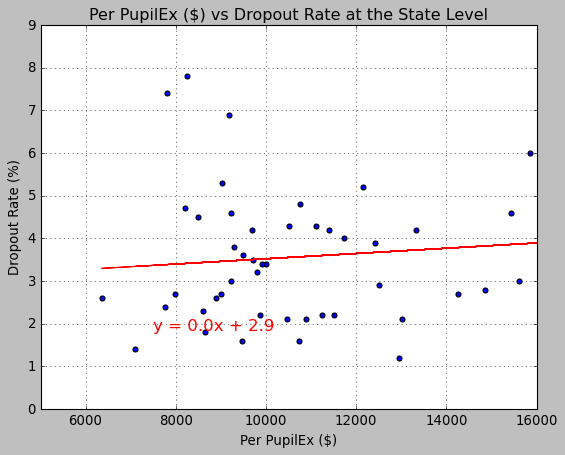

The correlation between both factors is 0.1198


In [8]:
# Total Support vs Dropout Rate
x_values = summary_2010['Per PupilEx ($)']
y_values = summary_2010['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

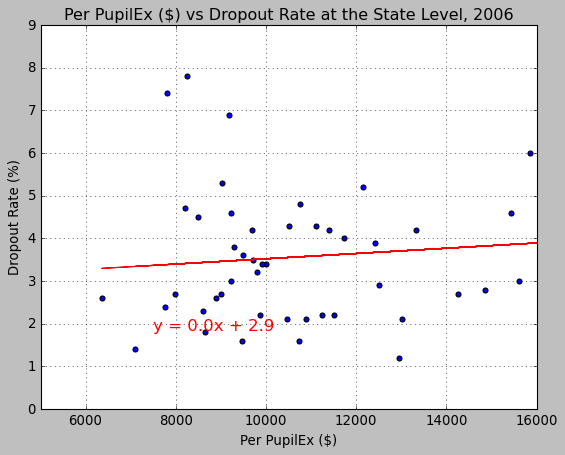

The correlation between both factors is 0.1198


In [9]:
# Total Support vs Dropout Rate
x_values = summary_2010['Per PupilEx ($)']
y_values = summary_2010['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level, 2006')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")